<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Exercises from DataCamp
solved by me

## Read, clean, validate

**Exploring DataFrame**

* Calculate the number of rows and columns in the DataFrame nsfg.
```
improt pandas as pd
# Display the number of rows and columns
nsfg.shape
```
```
nsfg.shape
(9358, 10)
```

* Display the names of the columns in nsfg.

```
# Display the names of the columns
nsfg.columns
```

```
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth', 'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'], dtype='object')
```

* Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.

```
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']
```

* Display the first 5 elements of ounces.

```
# Print the first 5 elements of ounces
print(ounces.head())
```

```
<script.py> output:
    0     4.0
    1    12.0
    2     4.0
    3     NaN
    4    13.0
    Name: birthwgt_oz1, dtype: float64
```




##Clean and Validate

**Validate a variable**

* How many pregnancies in this dataset ended with a live birth?


value	label
1	Live birth
2	Induced abortion
3	Stillbirth
4	Miscarriage
5	Ectopic pregnancy
6	Current pregnancy

```
In [4]:
birth = nsfg['outcome']
In [5]:
birth.value_counts().sort_index()
Out[5]:

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64
```

> 6489

**Cleaning a variable**

* In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
* Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.

```
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())
```

```
<script.py> output:
    1.0    6379
    2.0     100
    3.0       5
    Name: nbrnaliv, dtype: int64
```

**Compute a variable**

* Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.

```
# Select the columns and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100
```

* Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.

```
# Compute the difference
preg_length = agepreg-agecon
```

* Use .describe() to compute the mean duration and other summary statistics.

```
# Compute summary statistics
print(preg_length.describe())
```

```
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64
```




### Filter and visualize

**Make a histogram**

* Plot a histogram of agecon with 20 bins.

```
# Plot the histogram
plt.hist(agecon.dropna(), bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()
```

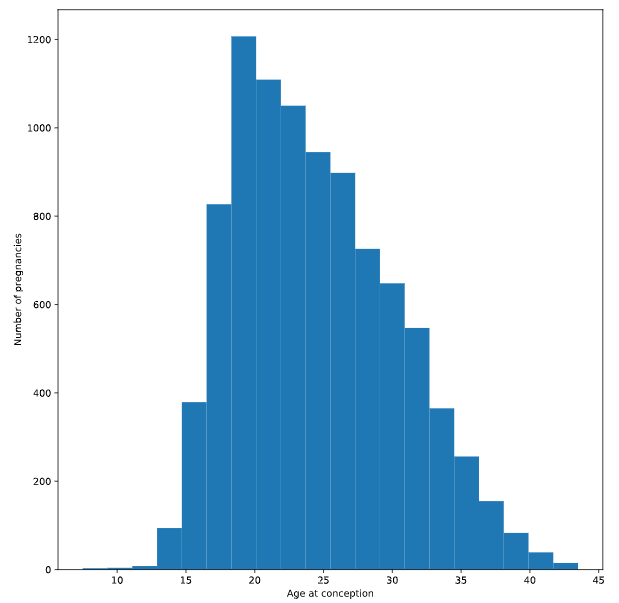


* Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

```
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()
```

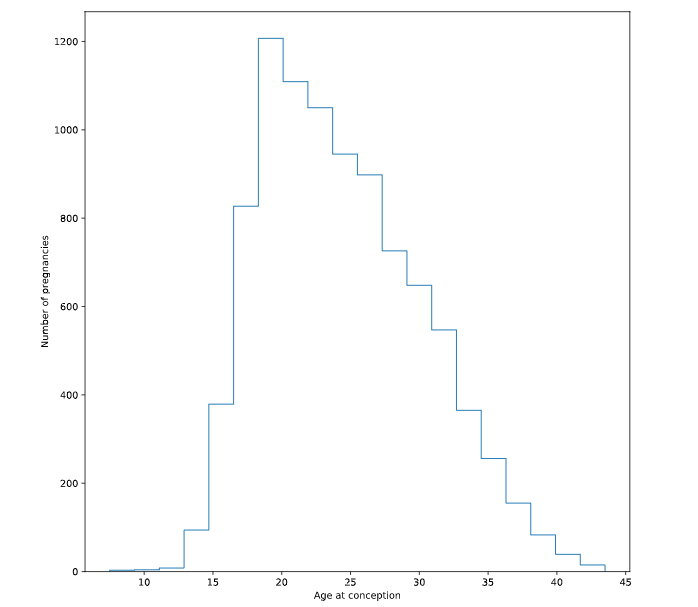

**Compute birth weight**

* Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
* Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
* Compute the mean weight of full-term babies.

```
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth']>=37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term] 

# Compute the mean weight of full-term babies
print(full_term_weight.mean())
```

**Filter**

* Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
*For comparison, select multiple, full-term babies and compute their mean birth weight.

```
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())
```

```
Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222
```



## Distributions

**Make a PMF**



* Make a PMF for year with normalize=False and display the result.

```
# Compute the PMF for year
pmf_year = Pmf(gss['year'], normalize=False)

# Print the result
print(pmf_year)
```

```
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: Pmf, dtype: int64
```
**Plot a PMF**

* Select the 'age' column from the gss DataFrame and store the result in age.

```
# Select the age column
age = gss['age']
```

* Make a normalized PMF of age. Store the result in pmf_age.
```
# Make a PMF of age
pmf_age = Pmf(age)
```
* Plot pmf_age as a bar chart.
```
# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()
```
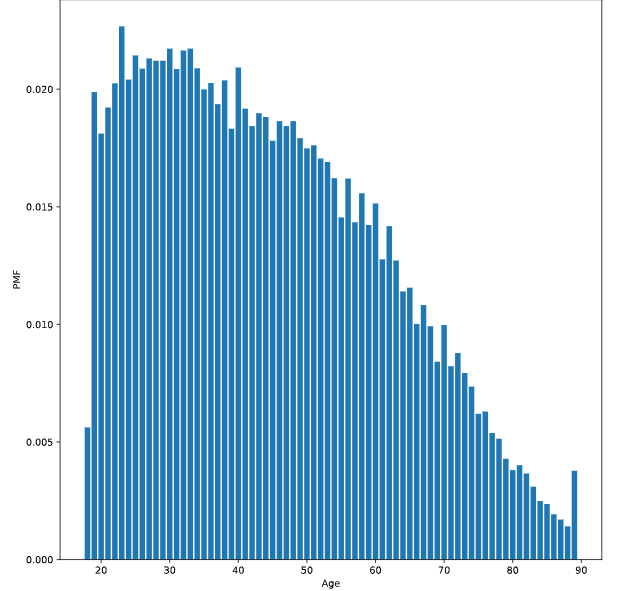

### Cumulative distribution functions

Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

**Make a CDF**

```
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))
```
```
<script.py> output:
    0.2539137136526388
```

* What fraction of the respondents in the GSS dataset are OLDER than 30?
>
Approximately 75%

**Compute IQR**

```
 # Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)
```
```
<script.py> output:
    29676.0
```

**Plot a CDF**

* Select 'realinc' from the gss dataset.
* Make a Cdf object called cdf_income.
* Create a plot of cdf_income using .plot().

```
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()
```

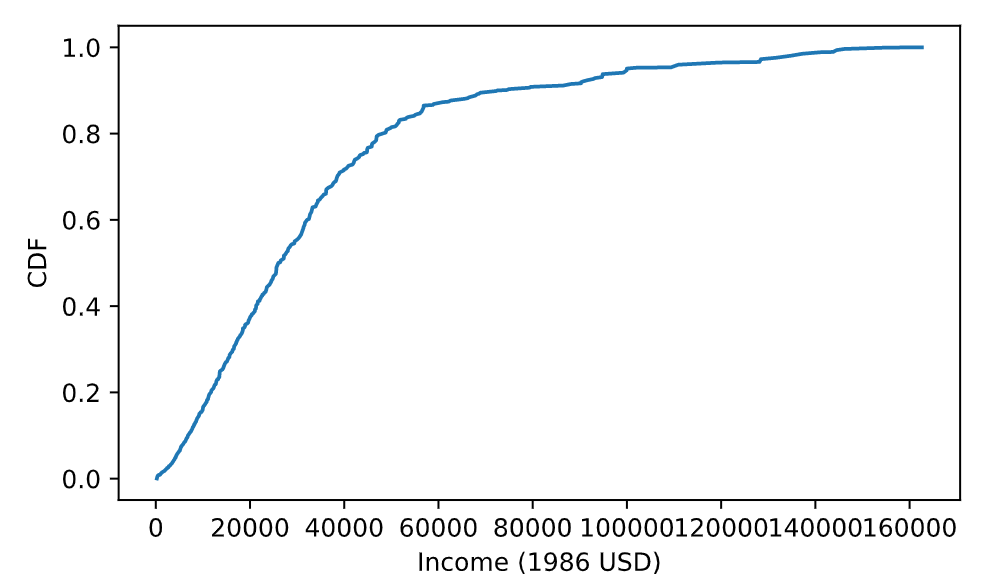



### Comparing distributions

**Extract education levels**

* Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
* Complete the line that identifies respondents with 12 or fewer years of education.
* Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

```
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >=14)

# High school (12 or fewer years of education)
high = (educ <=12)
print(high.mean())
```

**Plot income CDFs**

```
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()
```

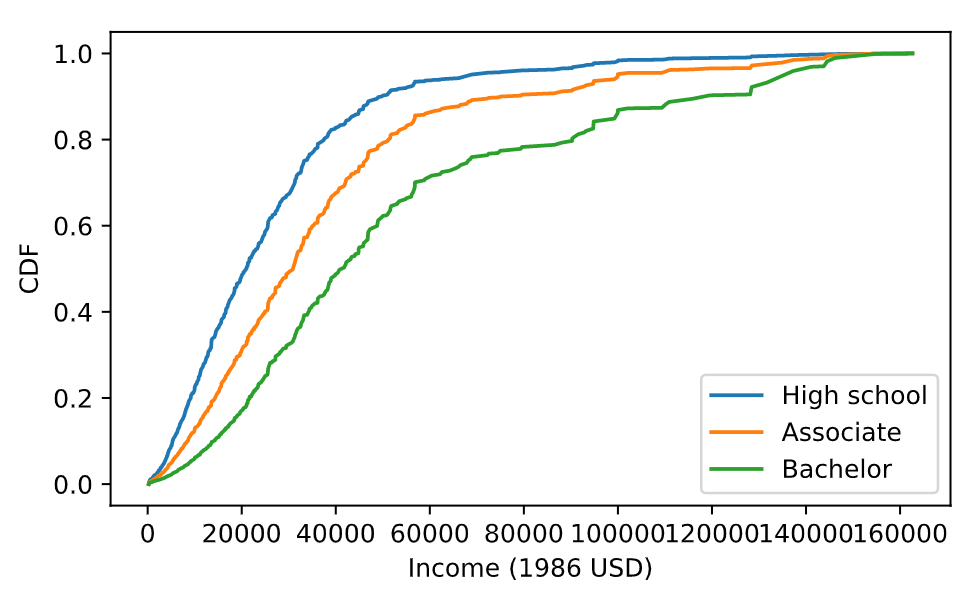

### Modeling distibutions

**Distribution of income**

```
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm([mean, std])
```

```
<script.py> output:
    4.371148677934171 0.42900437330100427
```
**Comparing CDFs**

* Evaluate the normal cumulative distribution function using dist.cdf.
* Use the Cdf() function to compute the CDF of log_income.
* Plot the result.

```
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()
```

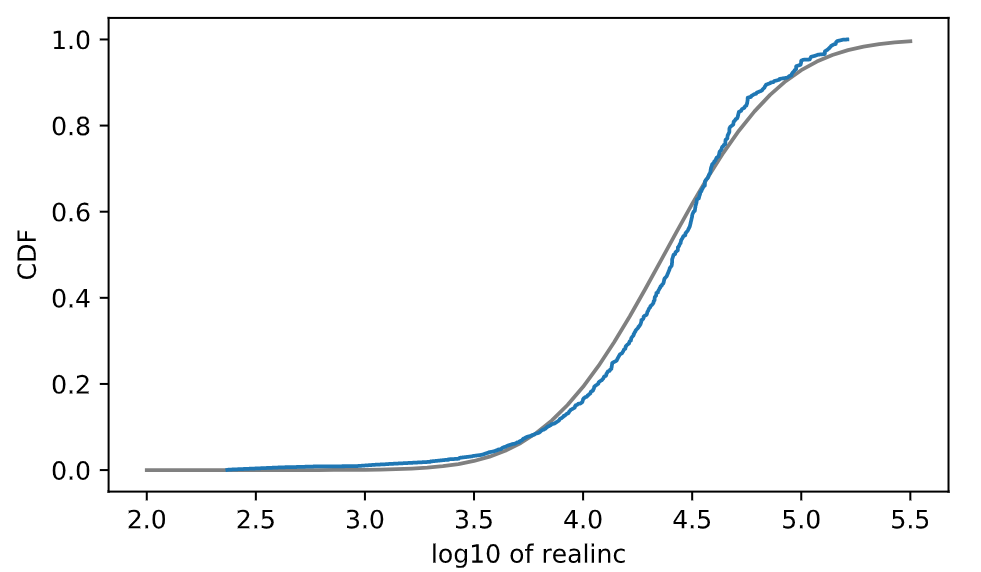

**Comparing PDFs**

* Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
* Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

```
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(data=log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()
```

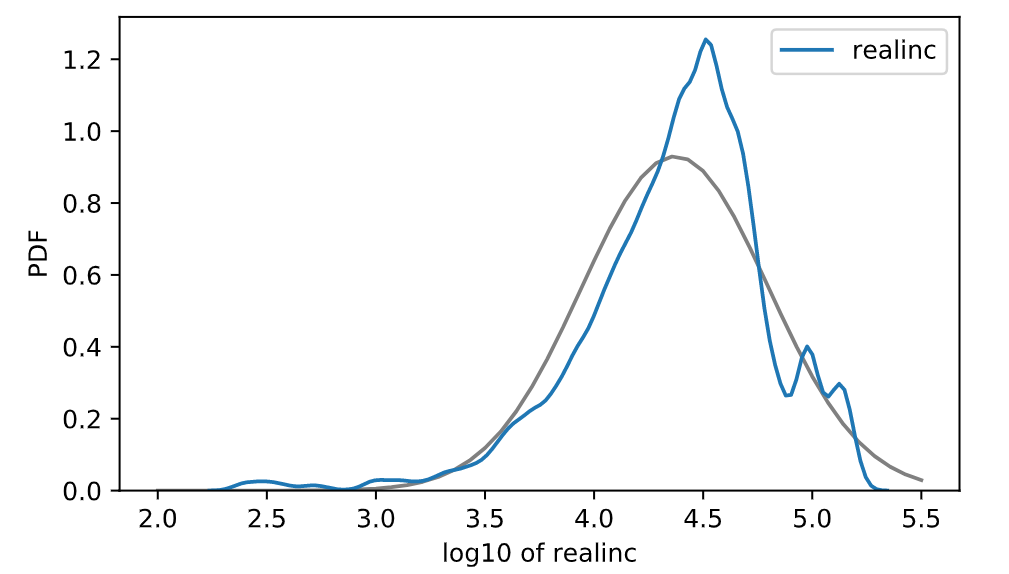

## Exploring relationships between variables

**PMF of age**

* Extract the variable 'AGE' from the DataFrame brfss and assign it to age.
* Get the PMF of age and plot it as a bar chart.

```

# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

```

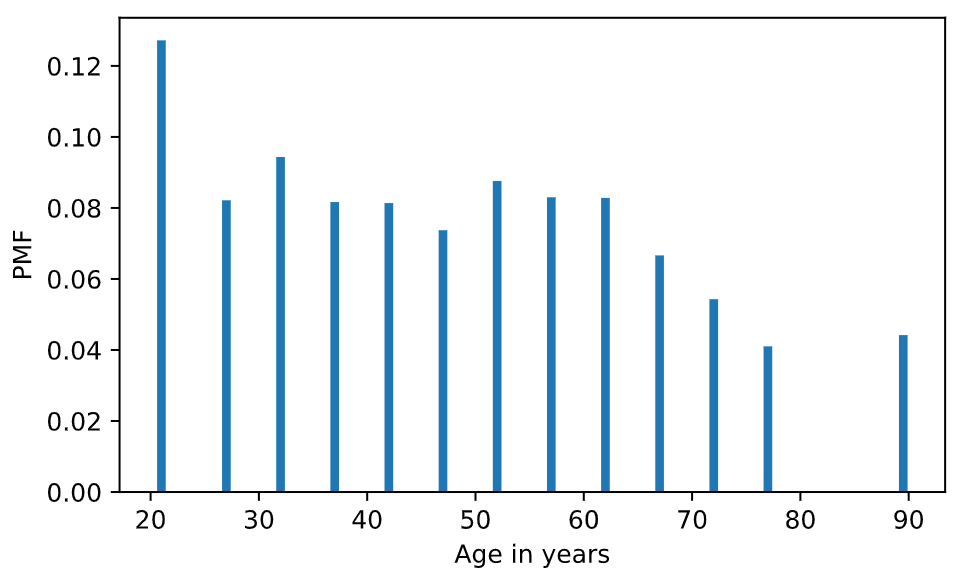

**Scatter plot of two numeric variables (comparison of variables)**

* Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

```
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()
```

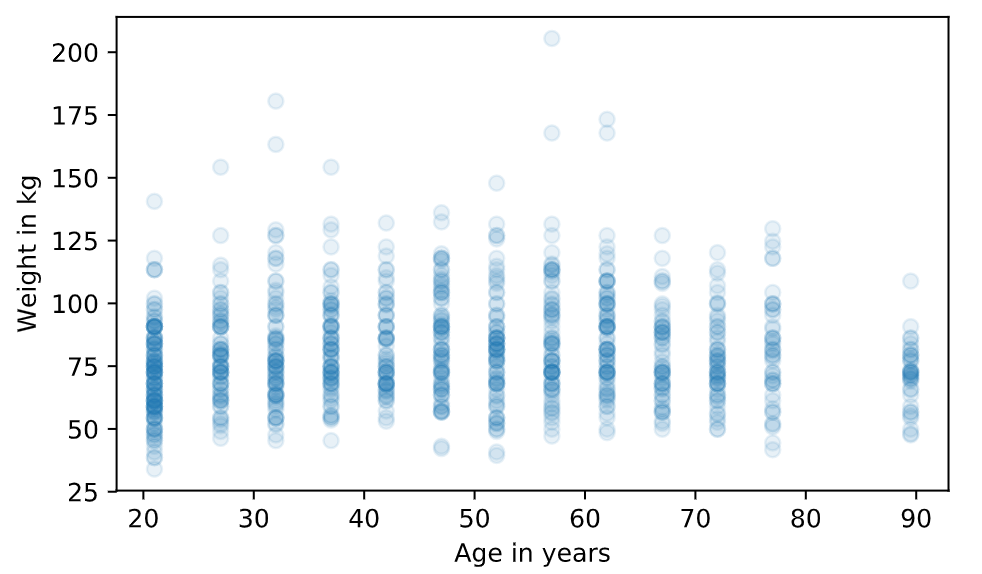



**Jittering**

```
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()
```
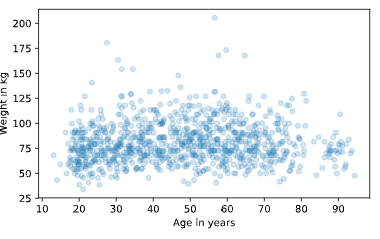

### Visualizing relationships

**.boxplot() to plot the distribution of weight in each height**

```
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data= data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()
```

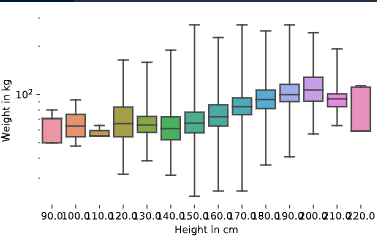

**Distribution of income**

* Extract 'INCOME2' from the brfss DataFrame and assign it to income.
* Plot the PMF of income as a bar chart.

```
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()
```

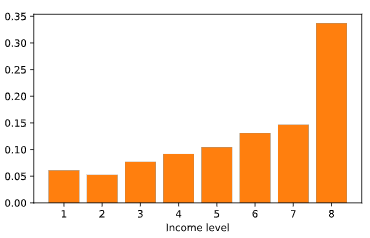

**Violinplot for visualizing relationship between income and height**

* Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.

```
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

```

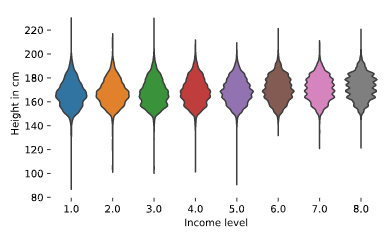

### Correlation coefficient

**Computing correlations**

* From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.
* Compute the correlation matrix for these variables.

```
# Select columns
columns = brfss['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]
# Compute the correlation matrix
print(subset.corr())
```
```
            AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000
```

### Simple regression

**The slope of the relationship between vegetable consumption and income.**

* Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
* Compute the simple linear regression of these variables.

```
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)
```


```
<script.py> output:
    LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
```

* Set fx to the minimum and maximum of xs, stored in a NumPy array.
* Set fy to the points on the fitted line that correspond to the fx.

```
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()
```

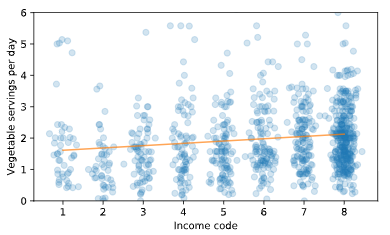

## Multivariate Thinking

**